## Fil for å test ODE

Trenger renteODE, inflasjonODE



In [27]:
import pandas as pd

In [32]:
annual_inflation_goal = 0.025  # Annual inflation goal in percentage

# Convert the annual inflation goal to a monthly percentage
monthly_inflation_goal = annual_inflation_goal / 12

print(monthly_inflation_goal)


0.0020833333333333333


In [29]:
df = pd.read_excel('siste_rente_kpi.xlsx')
df

,Unnamed: 0,Dato,Konsumprisindeks(2015=100),Månedsendring (prosent),Rente
0,0,1991-02,61.2,0.3,8.50
1,1,1991-03,61.6,0.7,8.50
2,2,1991-04,61.8,0.3,8.48
3,3,1991-05,61.9,0.2,8.20
4,4,1991-06,62.0,0.2,8.00
...,...,...,...,...,...
387,387,2023-05,129.6,0.5,3.21
388,388,2023-06,130.4,0.6,3.39
389,389,2023-07,130.9,0.4,3.75
390,390,2023-08,129.9,-0.8,3.86


Rente (RR)

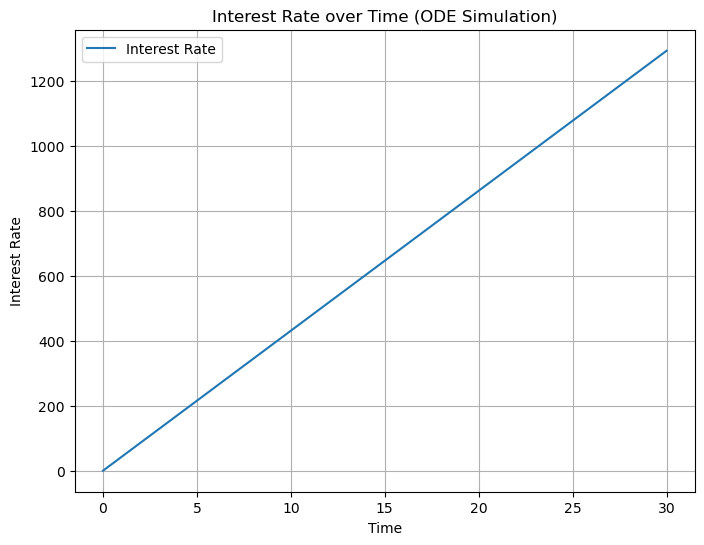

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function defining the ODE
def model(R, t, kpi_df, monthly_inflation_goal, BNP, potential_BNP):
    
    # Find the corresponding KPI value for the given time 't'
    kpi_row = kpi_df.loc[kpi_df['Time'] <= t].iloc[-1]  # Assuming 'Time' is a column in kpi_df
    KPI = kpi_row['KPI']  # Extract KPI value for the time 't'

    dRdt = ((KPI - monthly_inflation_goal) / monthly_inflation_goal) + ((BNP - potential_BNP) / potential_BNP)
    return dRdt

# Rest of the code remains the same

# Initial condition (initial interest rate)
initial_interest_rate = 0.05

# Time points
t = np.linspace(0, 30, 100)  # Time from 0 to 30 (arbitrary units)

# DataFrame containing KPI values over time (assuming the DataFrame is named kpi_df)
# kpi_df = ...  # Load or define your DataFrame with 'Time' and 'KPI' columns

# Solve the ODE
R = odeint(model, initial_interest_rate, t, args=(kpi_df, monthly_inflation_goal, BNP, potential_BNP))

# Plot
plt.figure(figsize=(8, 6))
plt.plot(t, R, label='Interest Rate')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate over Time (ODE Simulation)')
plt.legend()
plt.grid(True)
plt.show()

